### 4. LR (Logistic Regression, 로지스틱 회귀) 📊
이름은 "회귀"지만 사실은 분류 알고리즘!
시그모이드 함수(0~1)를 이용해 데이터를 두 그룹으로 나누며, 다중 클래스 분류에서는 소프트맥스(Softmax) 함수를 사용.
SVM과 약간 비슷한 방식이고, 선형으로 자료를 구분.

In [ ]:
# 라이브러리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# 1. 붓꽃 데이터 로드, X y 나누기
file_path = r"../source/iris.csv"  # 파일 경로 (r'': 문자열로 인식)
df = pd.read_csv(file_path)  # CSV 파일 읽기

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# # 이렇게 하면 붓꽃 데이터를 sklearn에서 가져올 수 있음
# from sklearn import datasets  # sklearn.datasets: sklearn에서 지원하는 데이터 모음 라이브러리
# iris = datasets.load_iris()

# X = iris.data[:, :4]  # 2D 시각화를 원한다면 특성을 2개만 사용할 것([:, :2])
# y = iris.target

X


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# 2. 데이터 표준화, train test 나누기
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

array([[-1.50652052e+00,  1.26346019e+00, -1.56873522e+00,
        -1.31297673e+00],
       [-1.73673948e-01,  3.11468391e+00, -1.28440670e+00,
        -1.05003079e+00],
       [ 1.03800476e+00,  1.06445364e-01,  3.64698715e-01,
         2.64698913e-01],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
        -1.31297673e+00],
       [-1.74885626e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [ 5.53333275e-01, -1.28197243e+00,  7.05892939e-01,
         9.22063763e-01],
       [ 6.74501145e-01,  3.37848329e-01,  4.21564419e-01,
         3.96171883e-01],
       [-7.79513300e-01,  1.03205722e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-7.79513300e-01,  2.42047502e+00, -1.28440670e+00,
        -1.44444970e+00],
       [-5.25060772e-02, -8.19166497e-01,  7.62758643e-01,
         9.22063763e-01],
       [ 1.89829664e-01,  8.00654259e-01,  4.21564419e-01,
      

In [16]:
# 3. 로지스틱 회귀 모델 생성, 학습
model = LogisticRegression(multi_class='ovr', solver='lbfgs')  # 다중 분류 (One-vs-Rest)
model.fit(X_train, y_train)

c:\Users\jt341\anaconda3\envs\2025AI\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [17]:
# 4. 학습한 모델로 예측, 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [18]:
# 5. 결과 출력

print(f"테스트 정확도: {accuracy:.2f}")
print("\n혼동 행렬:")
print(confusion_matrix(y_test, y_pred))
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

테스트 정확도: 0.93

혼동 행렬:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

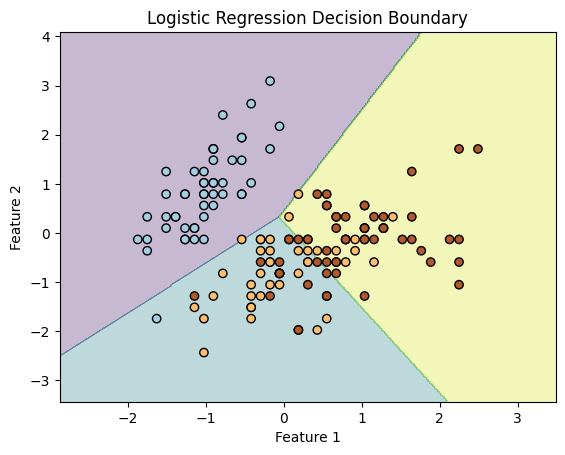

In [19]:
# 6. 결정 경계 시각화(1번에서 X에 속성을 2개만 넣어놓아야 작동)
def plot_decision_boundary(X, y, model):
    h = 0.02  # 그래프 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)  # 결정 경계
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.show()
    
plot_decision_boundary(X, y, model)